In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [32]:
def percent_scaling(series):
    return (series / 100)

def cpu_scaling(series):
    return (series * 4 / 100)

def single_cpu_scaling(series):
    return (((series - 100) * (-1)) / 100)

def min_max_scaling(series):
    return (series - series.min()) / (series.max() - series.min())

In [3]:
cpu_df = pd.read_csv('../results/cycle_cpu.csv')

cpu_df['cpu_percent'] = percent_scaling(cpu_df['cpu_percent'])
cpu_df['virtual_memory'] = percent_scaling(cpu_df['virtual_memory'])
cpu_df['adc_voltage_norm'] = percent_scaling(cpu_df['adc_voltage'])

cpu_df

,time,cpu_percent,virtual_memory,adc_voltage,adc_voltage_norm
0,2023-04-26 14:03:21.304178,0.254,0.216,0.127629,0.001276
1,2023-04-26 14:03:21.320244,0.000,0.216,0.104753,0.001048
2,2023-04-26 14:03:21.336414,0.000,0.216,0.104253,0.001043
3,2023-04-26 14:03:21.352451,0.000,0.216,0.104753,0.001048
4,2023-04-26 14:03:21.368512,0.000,0.216,0.103003,0.001030
...,...,...,...,...,...
8495,2023-04-26 14:05:39.745443,0.000,0.237,0.103628,0.001036
8496,2023-04-26 14:05:39.761443,0.000,0.237,0.108878,0.001089
8497,2023-04-26 14:05:39.777409,0.000,0.237,0.104253,0.001043
8498,2023-04-26 14:05:39.793450,0.000,0.237,0.104753,0.001048


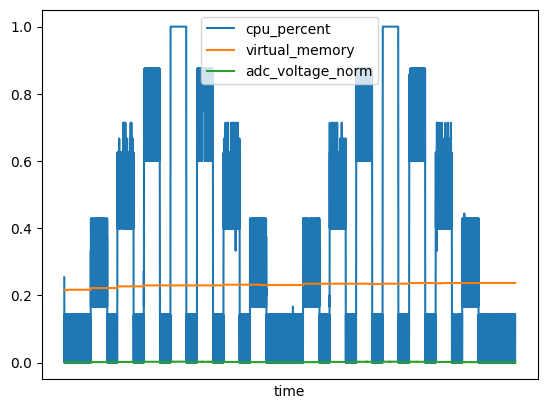

In [4]:
cpu_df_plot = cpu_df.plot(x='time', y=['cpu_percent','virtual_memory','adc_voltage_norm'])
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
cpu_df_plot.get_figure().savefig('cpu_stress_test.pdf', format='pdf')

In [5]:
cpu_df.drop('time', axis=1).corr()

,cpu_percent,virtual_memory,adc_voltage,adc_voltage_norm
cpu_percent,1.000000,0.142820,0.969186,0.969186
virtual_memory,0.142820,1.000000,0.149364,0.149364
adc_voltage,0.969186,0.149364,1.000000,1.000000
adc_voltage_norm,0.969186,0.149364,1.000000,1.000000


In [6]:
cpu_pca = PCA(n_components=4)
cpu_pca.fit(cpu_df.drop('time', axis=1))
cpu_pca.components_

array([[ 9.82797524e-01,  2.23642796e-03,  1.84663521e-01,
         1.84663521e-03],
       [ 1.84684337e-01, -1.65053704e-02, -9.82610155e-01,
        -9.82610155e-03],
       [-8.50445515e-04, -9.99861276e-01,  1.66336387e-02,
         1.66336387e-04],
       [ 2.13291171e-17,  1.94279397e-17,  9.99950004e-03,
        -9.99950004e-01]])

In [7]:
mem_df = pd.read_csv('../results/cycle_mem.csv')

mem_df['cpu_percent'] = percent_scaling(mem_df['cpu_percent'])
mem_df['virtual_memory'] = percent_scaling(mem_df['virtual_memory'])
mem_df['adc_voltage_norm'] = min_max_scaling(mem_df['adc_voltage'])

mem_df

,time,cpu_percent,virtual_memory,adc_voltage,adc_voltage_norm
0,2023-04-11 16:42:11.932995,0.165,0.250,0.151005,0.184010
1,2023-04-11 16:42:11.955088,0.000,0.250,0.099128,0.008460
2,2023-04-11 16:42:11.971054,0.000,0.250,0.102378,0.019459
3,2023-04-11 16:42:11.987074,0.000,0.250,0.101378,0.016074
4,2023-04-11 16:42:12.002988,0.000,0.250,0.100253,0.012267
...,...,...,...,...,...
8495,2023-04-11 16:44:31.788538,0.000,0.189,0.100503,0.013113
8496,2023-04-11 16:44:31.804511,0.143,0.189,0.100253,0.012267
8497,2023-04-11 16:44:31.820675,0.000,0.189,0.100628,0.013536
8498,2023-04-11 16:44:31.836613,0.000,0.189,0.103503,0.023266


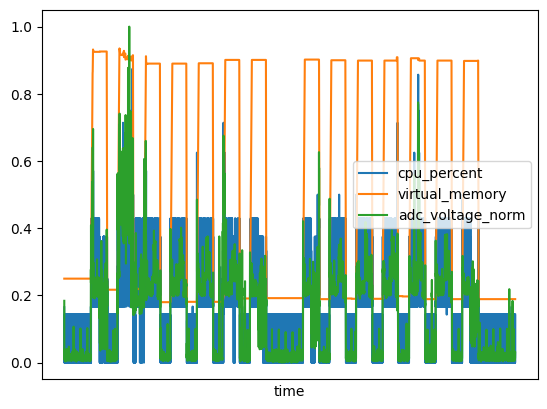

In [8]:
mem_df_plot = mem_df.plot(x='time', y=['cpu_percent','virtual_memory','adc_voltage_norm'])
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
mem_df_plot.get_figure().savefig('mem_stress_test.pdf', format='pdf')

In [9]:
mem_df.drop('time', axis=1).corr()

,cpu_percent,virtual_memory,adc_voltage,adc_voltage_norm
cpu_percent,1.000000,0.692906,0.769402,0.769402
virtual_memory,0.692906,1.000000,0.774211,0.774211
adc_voltage,0.769402,0.774211,1.000000,1.000000
adc_voltage_norm,0.769402,0.774211,1.000000,1.000000


In [10]:
mem_pca = PCA(n_components=4)
mem_pca.fit(mem_df.drop('time', axis=1))
mem_pca.components_

array([[ 3.28637566e-01,  8.91940030e-01,  8.80076225e-02,
         2.97817045e-01],
       [ 8.01501638e-01, -4.37319438e-01,  1.15584129e-01,
         3.91135709e-01],
       [-4.99592308e-01, -1.14868153e-01,  2.43325363e-01,
         8.23410955e-01],
       [-0.00000000e+00, -4.30513799e-17,  9.59003512e-01,
        -2.83394186e-01]])

In [11]:
both_df = pd.read_csv('../results/cycle_both.csv')

both_df['cpu_percent'] = percent_scaling(both_df['cpu_percent'])
both_df['virtual_memory'] = percent_scaling(both_df['virtual_memory'])
both_df['adc_voltage_norm'] = min_max_scaling(both_df['adc_voltage'])

both_df

,time,cpu_percent,virtual_memory,adc_voltage,adc_voltage_norm
0,2023-04-26 14:06:51.515135,0.184,0.226,0.163130,0.196749
1,2023-04-26 14:06:51.537342,0.000,0.226,0.121504,0.054320
2,2023-04-26 14:06:51.553483,0.000,0.226,0.115879,0.035073
3,2023-04-26 14:06:51.569508,0.000,0.226,0.117504,0.040633
4,2023-04-26 14:06:51.585658,0.143,0.226,0.116129,0.035928
...,...,...,...,...,...
4295,2023-04-26 14:08:03.998038,0.000,0.156,0.113003,0.025235
4296,2023-04-26 14:08:04.014044,0.143,0.156,0.107878,0.007699
4297,2023-04-26 14:08:04.030002,0.000,0.156,0.108253,0.008982
4298,2023-04-26 14:08:04.046017,0.143,0.156,0.107753,0.007271


In [12]:
both_df['datetime'] = pd.to_datetime(both_df['time'])

dt_origin = both_df['datetime'][0]
both_df['delta'] = both_df['datetime'].apply(lambda dt: (dt - dt_origin).total_seconds())

both_df = both_df.set_index(pd.DatetimeIndex(both_df['datetime']))
both_df

,time,cpu_percent,virtual_memory,adc_voltage,adc_voltage_norm,datetime,delta
datetime,,,,,,,
2023-04-26 14:06:51.515135,2023-04-26 14:06:51.515135,0.184,0.226,0.163130,0.196749,2023-04-26 14:06:51.515135,0.000000
2023-04-26 14:06:51.537342,2023-04-26 14:06:51.537342,0.000,0.226,0.121504,0.054320,2023-04-26 14:06:51.537342,0.022207
2023-04-26 14:06:51.553483,2023-04-26 14:06:51.553483,0.000,0.226,0.115879,0.035073,2023-04-26 14:06:51.553483,0.038348
2023-04-26 14:06:51.569508,2023-04-26 14:06:51.569508,0.000,0.226,0.117504,0.040633,2023-04-26 14:06:51.569508,0.054373
2023-04-26 14:06:51.585658,2023-04-26 14:06:51.585658,0.143,0.226,0.116129,0.035928,2023-04-26 14:06:51.585658,0.070523
...,...,...,...,...,...,...,...
2023-04-26 14:08:03.998038,2023-04-26 14:08:03.998038,0.000,0.156,0.113003,0.025235,2023-04-26 14:08:03.998038,72.482903
2023-04-26 14:08:04.014044,2023-04-26 14:08:04.014044,0.143,0.156,0.107878,0.007699,2023-04-26 14:08:04.014044,72.498909
2023-04-26 14:08:04.030002,2023-04-26 14:08:04.030002,0.000,0.156,0.108253,0.008982,2023-04-26 14:08:04.030002,72.514867


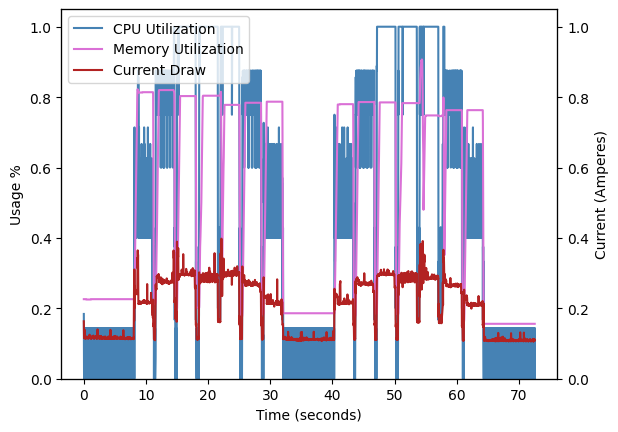

In [13]:
ax = both_df.plot(x='delta', y='cpu_percent', color='steelblue')
ax.set_ylim([0, 1.05])
ax.set(xlabel='Time (seconds)', ylabel='Usage %')
ax.get_legend().remove()

ax2 = ax.twinx()
ax2.yaxis.set_label_position('right')
ax2.set(ylabel='')
both_df.plot(ax=ax2, x='delta', y='virtual_memory', color='orchid')
ax2.set_ylim([0, 1.05])
ax2.get_yaxis().set_visible(False)
ax2.get_legend().remove()

ax3 = ax2.twinx()
both_df.plot(ax=ax3, x='delta', y='adc_voltage', color='firebrick')
ax3.set_ylim([0, 1.05])
ax3.set(ylabel='Current (Amperes)')
ax3.get_legend().remove()

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
ax3.legend(lines + lines2 + lines3, ['CPU Utilization', 'Memory Utilization', 'Current Draw'], loc=2)

ax.get_figure().savefig('merged_stress_test.pdf', format='pdf')

In [14]:
both_df.drop('time', axis=1).corr()

,cpu_percent,virtual_memory,adc_voltage,adc_voltage_norm,datetime,delta
cpu_percent,1.000000,0.846077,0.966865,0.966865,-0.003688,-0.003688
virtual_memory,0.846077,1.000000,0.852707,0.852707,-0.050207,-0.050207
adc_voltage,0.966865,0.852707,1.000000,1.000000,-0.039690,-0.039691
adc_voltage_norm,0.966865,0.852707,1.000000,1.000000,-0.039690,-0.039691
datetime,-0.003688,-0.050207,-0.039690,-0.039690,1.000000,1.000000
delta,-0.003688,-0.050207,-0.039691,-0.039691,1.000000,1.000000


In [33]:
fftw_df = pd.read_csv('../results/fftw.csv')

fftw_df['cpu_percent_0'] = single_cpu_scaling(fftw_df['cpu_percent_0'])
fftw_df['cpu_percent_1'] = single_cpu_scaling(fftw_df['cpu_percent_1'])
fftw_df['cpu_percent_2'] = single_cpu_scaling(fftw_df['cpu_percent_2'])
fftw_df['cpu_percent_3'] = single_cpu_scaling(fftw_df['cpu_percent_3'])
fftw_df['virtual_memory'] = percent_scaling(fftw_df['virtual_memory'])
fftw_df['adc_voltage_norm'] = min_max_scaling(fftw_df['adc_voltage'])

fftw_df

,time,cpu_percent_0,cpu_percent_1,cpu_percent_2,cpu_percent_3,virtual_memory,adc_voltage,adc_voltage_norm
0,2023-09-07 16:14:39.458168,0.043,-0.0,-0.0,-0.0,0.227,0.241007,0.355191
1,2023-09-07 16:14:39.484509,-0.000,-0.0,-0.0,-0.0,0.227,0.214757,0.211749
2,2023-09-07 16:14:39.504801,-0.000,-0.0,-0.0,-0.0,0.227,0.224882,0.267077
3,2023-09-07 16:14:39.525036,-0.000,-0.0,-0.0,-0.0,0.227,0.223007,0.256831
4,2023-09-07 16:14:39.545242,-0.000,-0.0,-0.0,-0.0,0.227,0.206131,0.164617
...,...,...,...,...,...,...,...,...
9495,2023-09-07 16:17:51.168309,-0.000,-0.0,-0.0,-0.0,0.214,0.214507,0.210383
9496,2023-09-07 16:17:51.188263,-0.000,-0.0,-0.0,-0.0,0.214,0.218132,0.230191
9497,2023-09-07 16:17:51.208214,-0.000,-0.0,-0.0,-0.0,0.214,0.231007,0.300546
9498,2023-09-07 16:17:51.228177,-0.000,-0.0,-0.0,-0.0,0.214,0.242007,0.360656


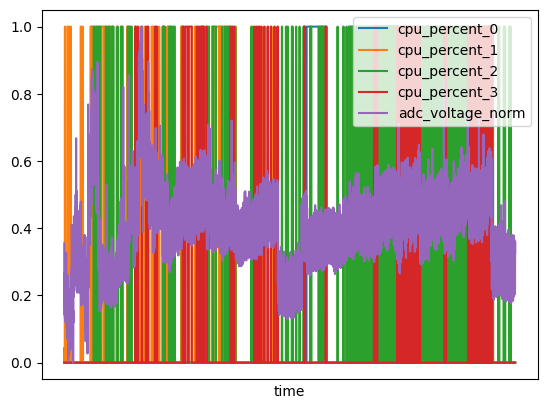

In [35]:
fftw_df.plot(x='time', y=['cpu_percent_0','cpu_percent_1','cpu_percent_2','cpu_percent_3','adc_voltage_norm'])
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)

In [36]:
fftw_df.drop('time', axis=1).corr()

,cpu_percent_0,cpu_percent_1,cpu_percent_2,cpu_percent_3,virtual_memory,adc_voltage,adc_voltage_norm
cpu_percent_0,1.000000,-0.175581,0.013227,-0.114196,-0.097893,0.047255,0.047255
cpu_percent_1,-0.175581,1.000000,-0.132165,-0.085960,-0.097240,-0.004183,-0.004183
cpu_percent_2,0.013227,-0.132165,1.000000,-0.085960,-0.011698,-0.030601,-0.030601
cpu_percent_3,-0.114196,-0.085960,-0.085960,1.000000,0.028401,0.139180,0.139180
virtual_memory,-0.097893,-0.097240,-0.011698,0.028401,1.000000,0.166903,0.166903
adc_voltage,0.047255,-0.004183,-0.030601,0.139180,0.166903,1.000000,1.000000
adc_voltage_norm,0.047255,-0.004183,-0.030601,0.139180,0.166903,1.000000,1.000000


In [26]:
fftw_pca = PCA(n_components=4)
fftw_pca.fit(fftw_df.drop('time', axis=1))
fftw_pca.components_

array([[-2.87070881e-04,  3.09881850e-04,  2.49223895e-04,
         1.29058538e-04, -1.66261930e-02,  1.41059549e-01,
         9.89861362e-01],
       [ 6.93824262e-03, -4.53978834e-03,  2.61127842e-03,
        -1.50470810e-03,  9.99822815e-01,  2.34593182e-03,
         1.64621770e-02],
       [-9.99390839e-01,  1.32490615e-02,  2.37548140e-02,
         2.07253683e-02,  6.96760973e-03, -2.59271312e-05,
        -1.81939228e-04],
       [-1.94703720e-02,  4.14033389e-02,  2.93178549e-02,
        -9.98521679e-01, -1.25757860e-03,  1.16029283e-05,
         8.14215731e-05]])